In [ ]:
# Tulis Program Anda Disini!
!pip install kaggle

In [ ]:
import os
import shutil
os.environ['KAGGLE_CONFIG_DIR'] = "/content/"

In [ ]:
# jika anda ingin menggunakan kaggle API untuk mengunduh dataset gunakan
# kode berikut untuk membantu anda membuat config kaggle.json
# pastikan anda mendaftar akun kaggle terlebih dahulu
# kemudian menuju halaman my account dan buat token API anda

api_token = {"username":"dharmahafidz","key":"c32ea0623741666236f124a2e11f5611"}
import json
import zipfile
import os
with open('/content/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /content/kaggle.json

In [ ]:
os.makedirs('/content/dataset') 
%cd dataset

/content/dataset


In [ ]:
!kaggle datasets download -d rifat963/dhakaai-dhaka-based-traffic-detection-dataset

100% 1.43G/1.43G [00:13<00:00, 125MB/s]
100% 1.43G/1.43G [00:13<00:00, 114MB/s]


In [ ]:
!unzip \*.zip &> /dev/null && rm *.zip

In [ ]:
import os
base_dataset = '/content/dataset/train'
class_dir = ['Final Train Dataset']
for class_item in class_dir:
  cur_dir = base_dataset+"/"+class_item
  dataset = os.listdir(cur_dir)
  for item in dataset:
    if not item.endswith(".jpg"):
        os.remove(os.path.join(cur_dir, item))

In [ ]:
import os

base_dir = '/content/dataset'

train = os.path.join(base_dir, 'train')
test = os.path.join(base_dir, 'test')

train1 = os.path.join(base_dir,'train')
train = os.path.join(train1,'Final Train Dataset')
test1 = os.path.join(base_dir,'test')
test = os.path.join(test1,'test')

#file training dan test
file_train = os.listdir(train)
file_test = os.listdir(test)

#Print jumlah data training dan test
print("Data Train : " + str(len(file_train)))
print("Data Test : " + str(len(file_test)))


Data Train : 2844
Data Test : 500


In [ ]:
# TULIS KODE ANDA DISINI

from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import shuffle

#melakukan rescaling, rotate,zoom, flip horizontal
batch_size = 32
augmen_gen = ImageDataGenerator(rescale=1 / 255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
#melakukan class mode= metode pemilihan clasifikasi, taret size= dimensi citra, batch size= banyak citra yg dimasukkan setiap step, shuffle= acak data tida sesusai alfabetik
train_aug = augmen_gen.flow_from_directory(
    '/content/dataset/train',
    class_mode = 'binary',
    shuffle=True,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb'
)

test_aug = augmen_gen.flow_from_directory(
    '/content/dataset/test',
    class_mode = 'binary',
    shuffle=False,
    target_size = (250,250),
    batch_size=batch_size,
    color_mode ='rgb',
)

Found 2844 images belonging to 1 classes.
Found 500 images belonging to 1 classes.


In [ ]:
# TULIS KODE ANDA DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout


# DEFINISIKAN MODEL ANDA DISINI

#Dropout = menetapkkan unit input ke 0 setiap langkah pelatihan yg membantu mencegah overviting
#BatchNormalization = menerepkan transformasi rata rata nilai antara 0 sampai 1
#meratakan input
#Feature Selection
model = Sequential()

model.add(InputLayer(input_shape=[250,250,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())

#Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 256)      0

In [ ]:
# Compile model
##Semakin besar nilai learning rate, maka proses training akan berjalan semakin cepat. Semakin besar learning rate, maka ketelitian jaringan akan semakin berkurang, dan berlaku sebaliknya.
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.00001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(train_aug,steps_per_epoch=10, epochs=100, validation_data=test_aug, validation_steps=10, verbose=2)

Epoch 1/100
10/10 - 38s - loss: 0.2044 - acc: 0.9125 - val_loss: 0.5794 - val_acc: 0.9906 - 38s/epoch - 4s/step
Epoch 2/100
10/10 - 25s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.5308 - val_acc: 0.9969 - 25s/epoch - 2s/step
Epoch 3/100
10/10 - 25s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.5126 - val_acc: 0.9937 - 25s/epoch - 2s/step
Epoch 4/100
10/10 - 24s - loss: 7.9772e-04 - acc: 1.0000 - val_loss: 0.4978 - val_acc: 0.9937 - 24s/epoch - 2s/step
Epoch 5/100
10/10 - 25s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.4858 - val_acc: 0.9937 - 25s/epoch - 2s/step
Epoch 6/100
10/10 - 25s - loss: 4.9559e-04 - acc: 1.0000 - val_loss: 0.4757 - val_acc: 1.0000 - 25s/epoch - 2s/step
Epoch 7/100
10/10 - 25s - loss: 4.0690e-04 - acc: 1.0000 - val_loss: 0.4548 - val_acc: 1.0000 - 25s/epoch - 2s/step
Epoch 8/100
10/10 - 25s - loss: 2.7896e-04 - acc: 1.0000 - val_loss: 0.4377 - val_acc: 1.0000 - 25s/epoch - 3s/step
Epoch 9/100
10/10 - 25s - loss: 9.6083e-04 - acc: 1.0000 - val_loss: 0.4217 - val_acc: 1

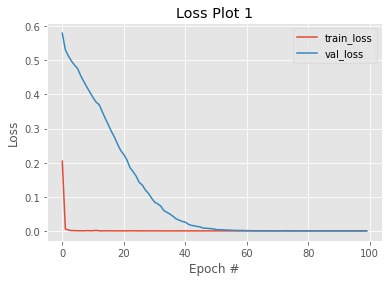

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot 1")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

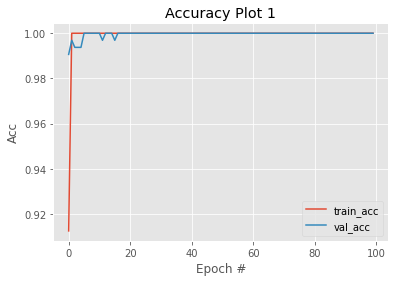

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot 1")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
# Tulis Program Anda Disini!
from sklearn.metrics import classification_report

ypred = model.predict(test_aug)
prediction = np.argmax(ypred, axis=1)
print(classification_report(test_aug.classes, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

